In [2]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [152]:
policy = None
with open('artifacts/policy.pkl', 'rb') as f:
    policy = pickle.load(f)
V = None
with open('artifacts/V.pkl', 'rb') as f:
    V = pickle.load(f)
deltas = None
with open('artifacts/deltas.pkl', 'rb') as f:
    deltas = pickle.load(f)


In [157]:
bounds = [i for i in range(0, 201, 5)]
#BINS = pd.IntervalIndex.from_tuples(bounds, closed="left")

Text(0.5, 1.0, 'Dose policy per blood presure range \n MIMIC dataset, 40 bins')

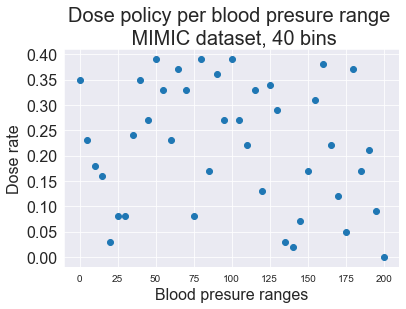

In [162]:
plt.scatter(bounds, policy.values())
plt.yticks(fontsize=16)
plt.xlabel("Blood presure ranges", fontsize=16)
plt.ylabel("Dose rate", fontsize=16)
plt.title("Dose policy per blood presure range \n MIMIC dataset, 40 bins", fontsize=20)

Text(0.5, 1.0, 'Expected value per blood presure range \n MIMIC dataset, 40 bins')

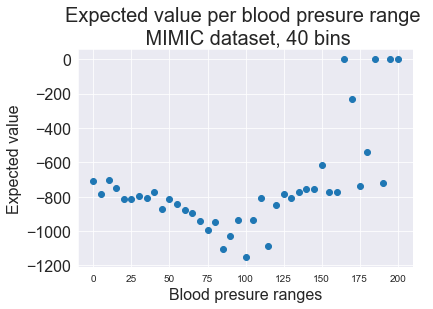

In [159]:
plt.scatter(bounds, V.values())
plt.yticks(fontsize=16)
plt.xlabel("Blood presure ranges", fontsize=16)
plt.ylabel("Expected value", fontsize=16)
plt.title("Expected value per blood presure range \n MIMIC dataset, 40 bins", fontsize=20)

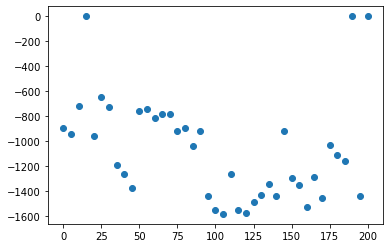

In [16]:
V_eICU = {'[0, 5)': -891.902810088655, '[5, 10)': -941.7108530903209, '[10, 15)': -715.5706743235438, '[15, 20)': 0, '[20, 25)': -956.8771036646839, '[25, 30)': -646.7442904105375, '[30, 35)': -729.5108941433076, '[35, 40)': -1191.106104467721, '[40, 45)': -1261.0351891411296, '[45, 50)': -1373.7501559149082, '[50, 55)': -761.5457283867016, '[55, 60)': -742.5347057405812, '[60, 65)': -815.7101069846249, '[65, 70)': -784.346413318027, '[70, 75)': -783.4919660042534, '[75, 80)': -915.9890494196754, '[80, 85)': -897.1924027970948, '[85, 90)': -1037.7809441340657, '[90, 95)': -916.7327145271619, '[95, 100)': -1434.2826017130628, '[100, 105)': -1552.1070744636843, '[105, 110)': -1581.4439777135783, '[110, 115)': -1260.6083888907544, '[115, 120)': -1549.2975108040923, '[120, 125)': -1575.6285001828026, '[125, 130)': -1485.5286243301193, '[130, 135)': -1427.2737753401127, '[135, 140)': -1342.7854436610223, '[140, 145)': -1434.780174932482, '[145, 150)': -920.6217576686292, '[150, 155)': -1295.3896606793712, '[155, 160)': -1347.6774251119234, '[160, 165)': -1522.5972811287577, '[165, 170)': -1285.481772081522, '[170, 175)': -1452.2193029778396, '[175, 180)': -1030.500927587942, '[180, 185)': -1110.982194135561, '[185, 190)': -1154.9401727046347, '[190, 195)': 0, '[195, 200)': -1441.409991887117, '[200, 205)': 0}
policy_eICU = {'[0, 5)': 0.17, '[5, 10)': 0.22, '[10, 15)': 0.31, '[15, 20)': 0.0, '[20, 25)': 0.06, '[25, 30)': 0.17, '[30, 35)': 0.26, '[35, 40)': 0.27, '[40, 45)': 0.2, '[45, 50)': 0.25, '[50, 55)': 0.09, '[55, 60)': 0.15, '[60, 65)': 0.2, '[65, 70)': 0.2, '[70, 75)': 0.11, '[75, 80)': 0.15, '[80, 85)': 0.09, '[85, 90)': 0.21, '[90, 95)': 0.09, '[95, 100)': 0.26, '[100, 105)': 0.09, '[105, 110)': 0.07, '[110, 115)': 0.08, '[115, 120)': 0.05, '[120, 125)': 0.18, '[125, 130)': 0.31, '[130, 135)': 0.24, '[135, 140)': 0.03, '[140, 145)': 0.32, '[145, 150)': 0.13, '[150, 155)': 0.31, '[155, 160)': 0.37, '[160, 165)': 0.05, '[165, 170)': 0.11, '[170, 175)': 0.39, '[175, 180)': 0.02, '[180, 185)': 0.35000000000000003, '[185, 190)': 0.06, '[190, 195)': 0.0, '[195, 200)': 0.17, '[200, 205)': 0.0}
plt.scatter(bounds, V_eICU.values())

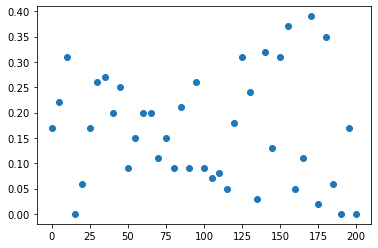

In [17]:
plt.scatter(bounds, policy_eICU.values())

# 8 Bins with 3 steps average

In [166]:
policy_eICU_small_bins = None
with open('artifacts/policy_eICU_small_bins.pkl', 'rb') as f:
    policy_eICU_small_bins = pickle.load(f)
V_eICU_small_bins = None
with open('artifacts/V_eICU_small_bins.pkl', 'rb') as f:
    V_eICU_small_bins = pickle.load(f)

In [4]:
def plot_ranges(bins, y_values, xlabel, ylabel, title, bar_color):
    sns.set_style("darkgrid")
    plt.figure(figsize=(8,5))
    line_x = []
    line_y = []
    for b, v in zip(bins, y_values):
        plt.plot([max(b.left, 30), min(b.right, 120)], [v, v], lw=10, color=bar_color, solid_capstyle="butt", zorder=1)#Setting capstyle to butt, because otherwise the length of the line is slightly longer, than required
        plt.scatter((max(b.left, 30) + min(b.right, 120))/2, v, zorder=2, color="red")#Setting capstyle to butt, because otherwise the length of the line is slightly longer, than required
        line_x.append((max(b.left, 30) + min(b.right, 120))/2)
        line_y.append(v)
    plt.plot(line_x, line_y, zorder=3, color="red")#Setting capstyle to butt, because otherwise the length of the line is slightly longer, than required
    plt.xticks(range(30, 120, 10), fontsize=14)
    plt.yticks(fontsize=16)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.title(title, fontsize=20)
    plt.margins(0.1)
    plt.show()

In [5]:
BINS = pd.IntervalIndex.from_tuples([(0,50),(50,60),(60,65),(65,70),(70,75),(75,80),(80,90),(90,200)], closed="left")
plot_ranges(BINS,
            V_eICU_small_bins.values(),
            "Blood presure ranges",
            "Expected value",
            "Expected value per blood presure range \n eICU demo dataset, 8 bins \n moving average of 3",
            "blue")

NameError: name 'V_eICU_small_bins' is not defined

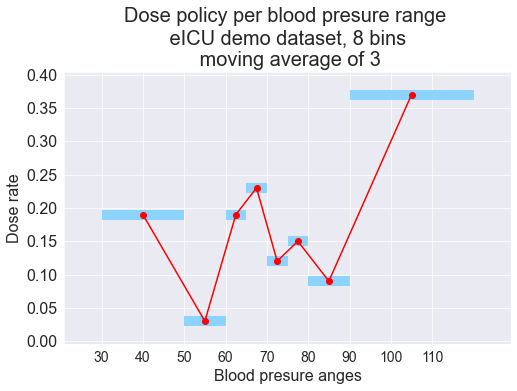

In [189]:
plot_ranges(BINS,
            policy_eICU_small_bins.values(),
            "Blood presure anges",
            "Dose rate",
            "Dose policy per blood presure range \n eICU demo dataset, 8 bins \n moving average of 3",
           "#8cd3ff")

# 11 bins

In [172]:
policy_eICU_11_bins = None
with open('artifacts/policy_eICU_11_bins.pkl', 'rb') as f:
    policy_eICU_11_bins = pickle.load(f)
V_eICU_11_bins = None
with open('artifacts/V_eICU_11_bins.pkl', 'rb') as f:
    V_eICU_11_bins = pickle.load(f)

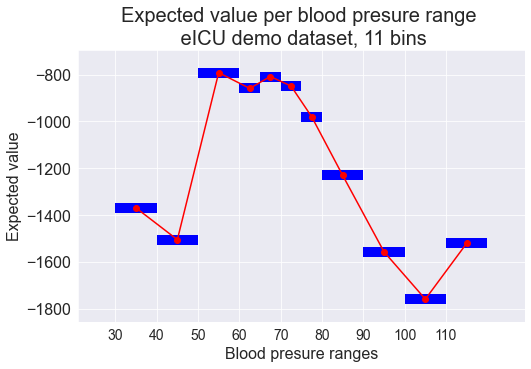

In [175]:
BINS = pd.IntervalIndex.from_tuples([(0, 40), (40, 50), (50, 60), (60, 65), (65, 70), (70, 75), (75, 80), (80, 90), (90, 100), (100, 110),
         (110, 200)], closed="left")
plot_ranges(BINS,
            V_eICU_11_bins.values(),
            "Blood presure ranges",
            "Expected value",
            "Expected value per blood presure range \n eICU demo dataset, 11 bins",
            "blue")

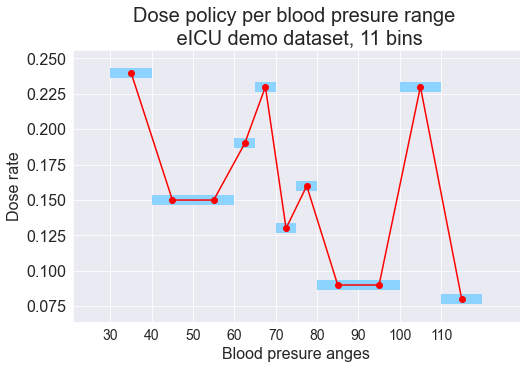

In [176]:
plot_ranges(BINS,
            policy_eICU_11_bins.values(),
            "Blood presure anges",
            "Dose rate",
            "Dose policy per blood presure range \n eICU demo dataset, 11 bins",
           "#8cd3ff")

# 8 bins, not averages 

In [183]:
policy_eICU_8_bins_no_avg = None
with open('artifacts/policy_eICU_8_bins_no_avg.pkl', 'rb') as f:
    policy_eICU_8_bins_no_avg = pickle.load(f)
V_eICU_8_bins_no_avg = None
with open('artifacts/V_eICU_8_bins_no_avg.pkl', 'rb') as f:
    V_eICU_8_bins_no_avg = pickle.load(f)

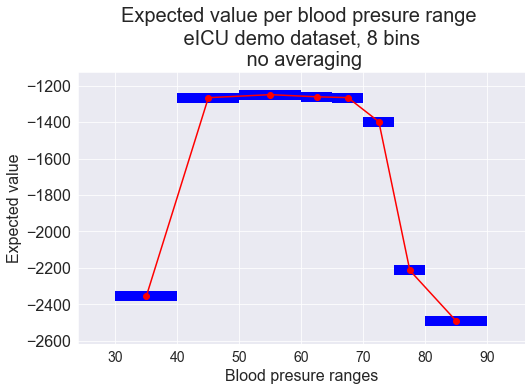

In [190]:
BINS = pd.IntervalIndex.from_tuples([(0, 40), (40, 50), (50, 60), (60, 65), (65, 70), (70, 75), (75, 80), (80, 90), (90, 100), (100, 110),
         (110, 200)], closed="left")
plot_ranges(BINS,
            V_eICU_8_bins_no_avg.values(),
            "Blood presure ranges",
            "Expected value",
            "Expected value per blood presure range \n eICU demo dataset, 8 bins \n no averaging",
            "blue")

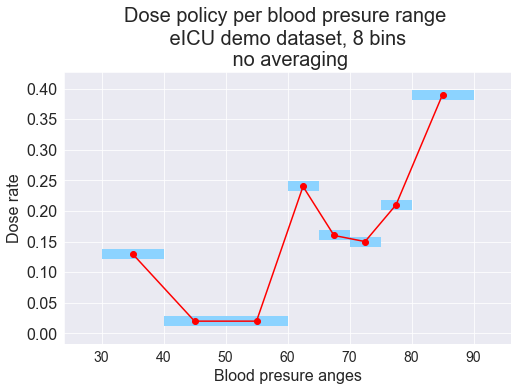

In [191]:
plot_ranges(BINS,
            policy_eICU_8_bins_no_avg.values(),
            "Blood presure anges",
            "Dose rate",
            "Dose policy per blood presure range \n eICU demo dataset, 8 bins \n no averaging",
           "#8cd3ff")

# MIMIC 8 bins

In [6]:
BINS = pd.IntervalIndex.from_tuples([(0, 40), (40, 50), (50, 60), (60, 65), (65, 70), (70, 75), (75, 80), (80, 90), (90, 100), (100, 110),
         (110, 200)], closed="left")

In [7]:
policy_MIMIC_bins_no_avg = None
with open('../artifacts/policy_MIMIC_8_bins_no_avg.pkl', 'rb') as f:
    policy_MIMIC_bins_no_avg = pickle.load(f)
V_MIMIC_8_bins_no_avg = None
with open('../artifacts/V_MIMIC_8_bins_no_avg.pkl', 'rb') as f:
    V_MIMIC_8_bins_no_avg = pickle.load(f)

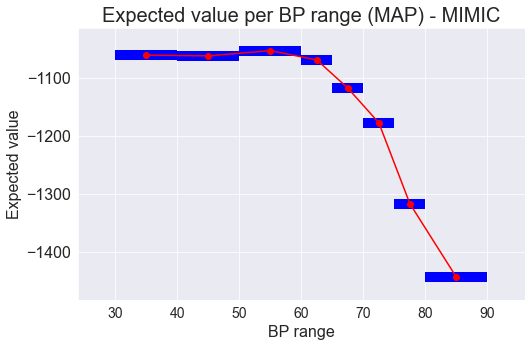

In [16]:
plot_ranges(BINS,
            V_MIMIC_8_bins_no_avg.values(),
            "BP range",
            "Expected value",
            "Expected value per BP range (MAP) - MIMIC",
            "blue")

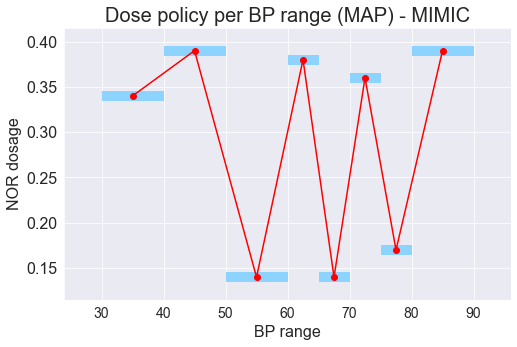

In [17]:
plot_ranges(BINS,
            policy_MIMIC_bins_no_avg.values(),
            "BP range",
            "NOR dosage",
            "Dose policy per BP range (MAP) - MIMIC",
            "#8cd3ff")